<a href="https://colab.research.google.com/github/AtufaShireen/Hackathons/blob/main/churn_prediction_jobathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, f1_score
from sklearn.model_selection import KFold
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import GridSearchCV

# Reading Data

In [ ]:
train_df = pd.read_csv("/content/train_PDjVQMB.csv")
train_df.shape

(6650, 11)

In [ ]:
test_df = pd.read_csv("/content/test_lTY72QC.csv")
test_df.shape

(2851, 10)

# Data Overview

In [ ]:
train_df.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [ ]:
test_df.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,55480787,50,Female,More than 15L,1008636.39,2,1,2,1,Average
1,9aededf2,36,Male,5L - 10L,341460.72,2,0,2,1,Average
2,a5034a09,25,Female,10L - 15L,439460.10,0,0,2,1,Good
3,b3256702,41,Male,Less than 5L,28581.93,0,1,2,1,Poor
4,dc28adb5,48,Male,More than 15L,1104540.03,2,1,3+,0,Good


In [ ]:
train_df.describe(include=['object'])

,ID,Gender,Income,Product_Holdings,Credit_Category
count,6650,6650,6650,6650,6650
unique,6650,2,4,3,3
top,84e2fcc9,Male,10L - 15L,1,Poor
freq,1,3612,1885,3200,3076


In [ ]:
test_df.describe(include=['number'])

,Age,Balance,Vintage,Transaction_Status,Credit_Card
count,2851.000000,2.851000e+03,2851.000000,2851.000000,2851.000000
mean,41.252192,8.098990e+05,2.220975,0.506840,0.668888
std,9.616756,5.252003e+05,1.489941,0.500041,0.470696
min,21.000000,1.503000e+03,0.000000,0.000000,0.000000
25%,34.000000,4.009684e+05,1.000000,0.000000,0.000000
50%,40.000000,7.659125e+05,2.000000,1.000000,1.000000
75%,47.000000,1.154238e+06,3.000000,1.000000,1.000000
max,72.000000,2.434834e+06,5.000000,1.000000,1.000000


In [ ]:
test_df.describe(include=['object'])

,ID,Gender,Income,Product_Holdings,Credit_Category
count,2851,2851,2851,2851,2851
unique,2851,2,4,3,3
top,55480787,Male,10L - 15L,2,Poor
freq,1,1545,844,1359,1270


# Null values

In [ ]:
print(train_df.isnull().sum().sum())
print(test_df.isnull().sum().sum())

0
0


* No null values great!

# Univariate Analysis

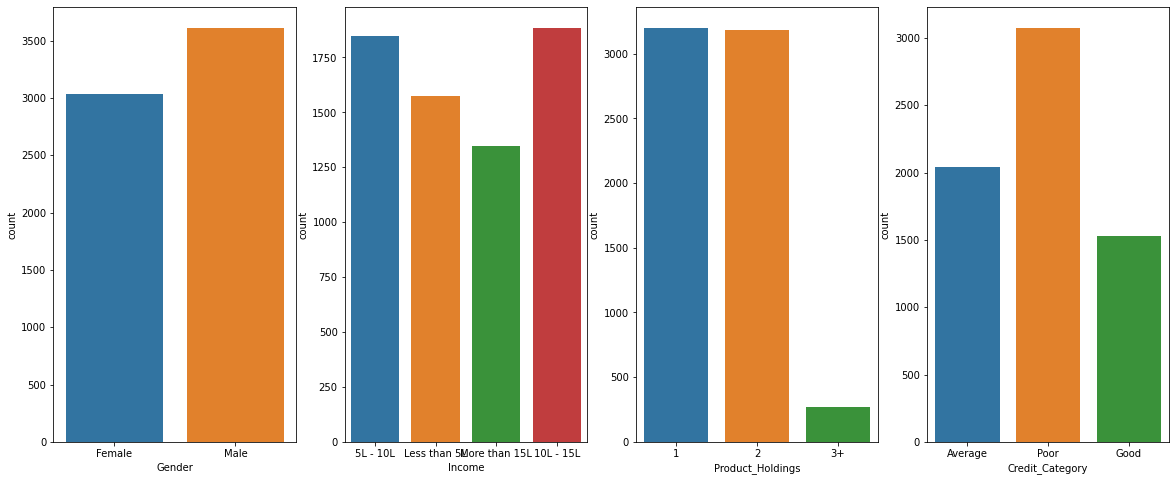

In [ ]:
fig, axs = plt.subplots(ncols=4,figsize=(20,8))
# plt.figure()
sns.countplot(x = train_df['Gender'],ax=axs[0])
sns.countplot(x = train_df['Income'],ax=axs[1])
sns.countplot(x = train_df['Product_Holdings'],ax=axs[2])
sns.countplot(x = train_df['Credit_Category'],ax=axs[3])
fig.show()

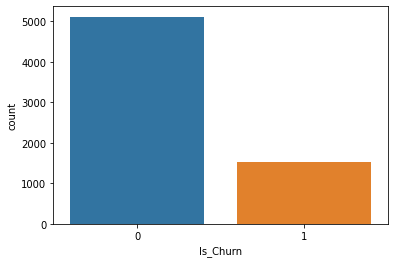

In [ ]:
sns.countplot(x= train_df['Is_Churn'])
plt.show()

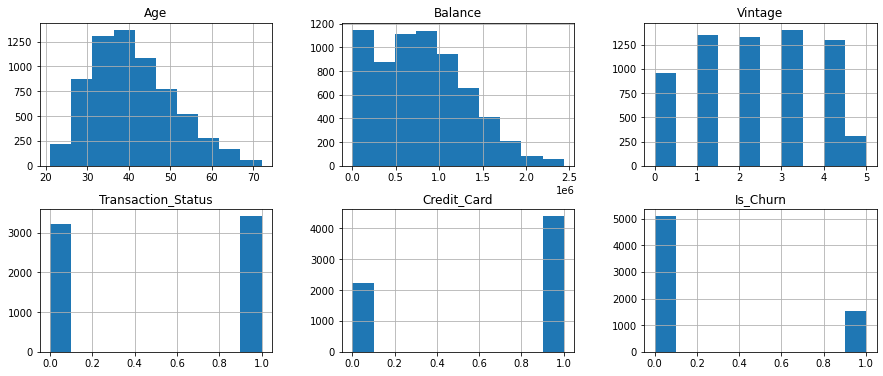

In [ ]:
train_df.select_dtypes('number').hist(figsize=(15,30),layout=(9,3))
plt.show()

# Bivariate Analysis (With target)

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

The relation between Gender and Is_Churn(Categorical Variables)
* Hypothesis (H0): There is no relation between the both

a) Graphical Method

> Pie chart
> Barcharts

b) statistical Method
> Chi Square Test

In [ ]:
def cat_cat_rel(crosstab):
    stat, p, dof, expected = chi2_contingency(crosstab)
    print('Degress of freedom = %d' % dof)
    # print(expected)
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

    alpha = 0.05
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print('Dependent (We reject H0)')
    else:
        print('Independent (We fail to reject H0)')

In [ ]:
def kde_target(var_name, df):
    
    # Calculate the correlation coefficient between the new variable and the target
    corr = df['Is_Churn'].corr(df[var_name])
    
    # Calculate medians for repaid vs not repaid
    avg_repaid = df.ix[df['Is_Churn'] == 0, var_name].median()
    avg_not_repaid = df.ix[df['Is_Churn'] == 1, var_name].median()
    
    plt.figure(figsize = (12, 6))
    
    # Plot the distribution for Is_Churn == 0 and Is_Churn == 1
    sns.kdeplot(df.ix[df['Is_Churn'] == 0, var_name], label = 'Is_Churn == 0')
    sns.kdeplot(df.ix[df['Is_Churn'] == 1, var_name], label = 'Is_Churn == 1')
    
    # label the plot
    plt.xlabel(var_name); plt.ylabel('Density'); plt.title('%s Distribution' % var_name)
    plt.legend();
    
    # print out the correlation
    print('The correlation between %s and the Is_Churn is %0.4f' % (var_name, corr))
    # Print out average values
    print('Median value for loan that was not repaid = %0.4f' % avg_not_repaid)
    print('Median value for loan that was repaid =     %0.4f' % avg_repaid)

Degress of freedom = 1
probability=0.950, critical=3.841, stat=18.843
significance=0.050, p=0.000
Dependent (We reject H0)


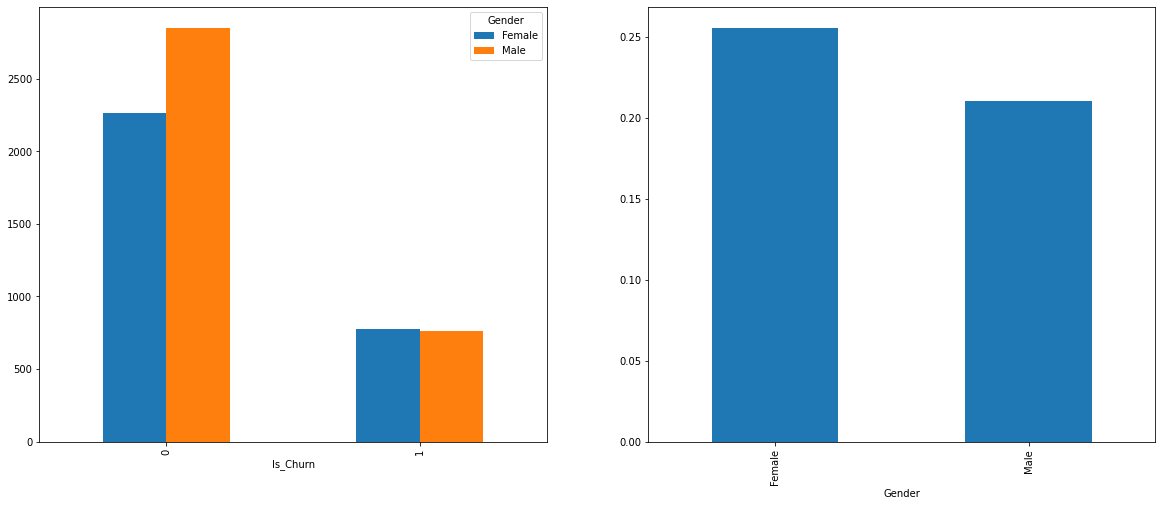

In [ ]:
crosstab = pd.crosstab(train_df["Is_Churn"], train_df["Gender"])
fig,axs = plt.subplots(figsize=(20,8),ncols=2)
crosstab.plot(kind="bar",ax=axs[0])
f = crosstab.T
f['churn_rate'] = (f[1]/ (f[0]+f[1]))
f['churn_rate'].plot(kind='bar')
cat_cat_rel(crosstab)

* Therefore, there is ***relation*** between Gender and Is_Churn.
* Females had higher churn

Degress of freedom = 2
probability=0.950, critical=5.991, stat=7.305
significance=0.050, p=0.026
Dependent (We reject H0)


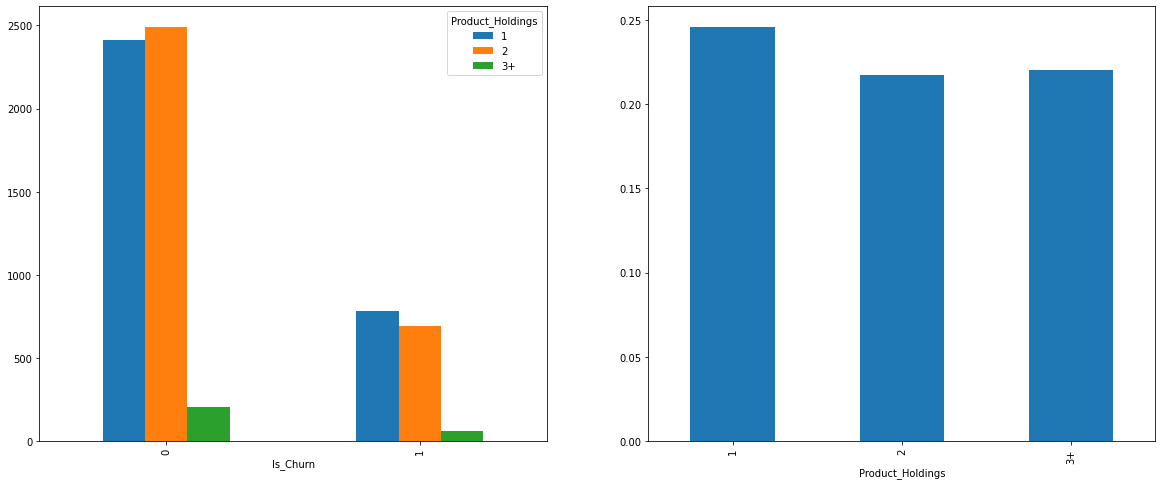

In [ ]:
crosstab = pd.crosstab(train_df["Is_Churn"], train_df["Product_Holdings"])
fig,axs = plt.subplots(figsize=(20,8),ncols=2)
crosstab.plot(kind="bar",ax=axs[0])
f = crosstab.T
f['churn_rate'] = (f[1]/ (f[0]+f[1])) 
f['churn_rate'].plot(kind='bar')
cat_cat_rel(crosstab)

* Therefore, there is **relation** between Product_Holdings and Is_Churn.
* Users with with 1 products have higher churn rate.

Degress of freedom = 1
probability=0.950, critical=3.841, stat=0.001
significance=0.050, p=0.969
Independent (We fail to reject H0)


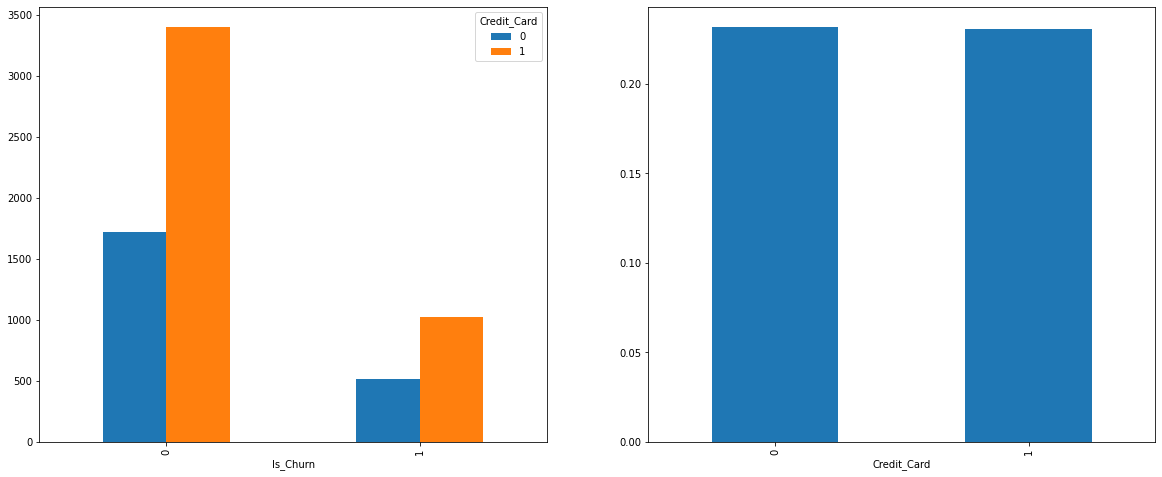

In [ ]:
crosstab = pd.crosstab(train_df["Is_Churn"], train_df["Credit_Card"])
fig,axs = plt.subplots(figsize=(20,8),ncols=2)
crosstab.plot(kind="bar",ax=axs[0])
f = crosstab.T
f['churn_rate'] = f[1]/ (f[0]+f[1])
f['churn_rate'].plot(kind='bar')
cat_cat_rel(crosstab)

* Therefore, there is **no relation** between Credit_Card and Is_Churn.


Degress of freedom = 5
probability=0.950, critical=11.070, stat=10.157
significance=0.050, p=0.071
Independent (We fail to reject H0)


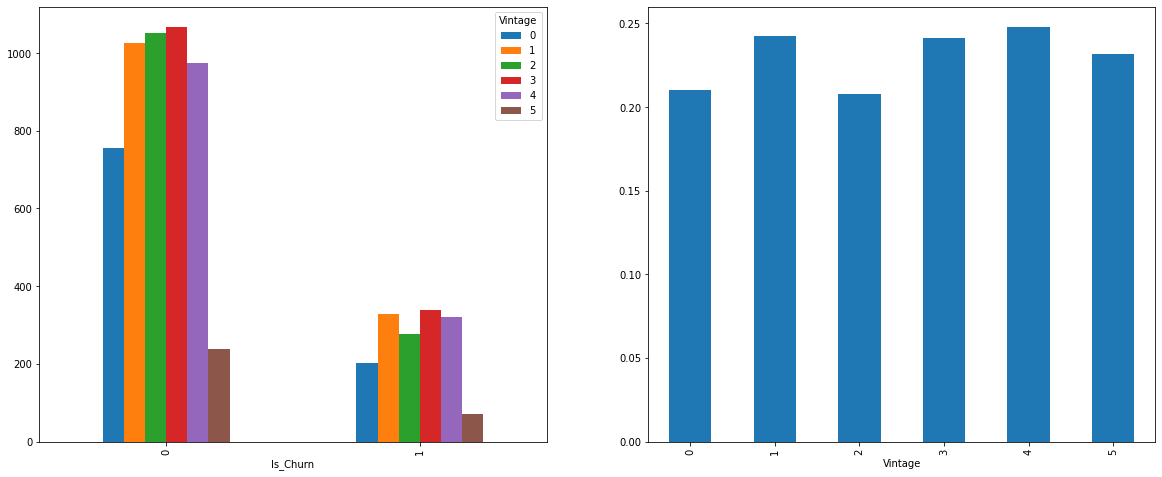

In [ ]:
crosstab = pd.crosstab(train_df["Is_Churn"], train_df["Vintage"])
fig,axs = plt.subplots(figsize=(20,8),ncols=2)
crosstab.plot(kind="bar",ax=axs[0])
f = crosstab.T
f['churn_rate'] = f[1]/ (f[0]+f[1])
f['churn_rate'].plot(kind='bar')
cat_cat_rel(crosstab)

* *Therefore*, there is ***no relation*** between Vintage and Is_Churn

Degress of freedom = 2
probability=0.950, critical=5.991, stat=10.305
significance=0.050, p=0.006
Dependent (We reject H0)


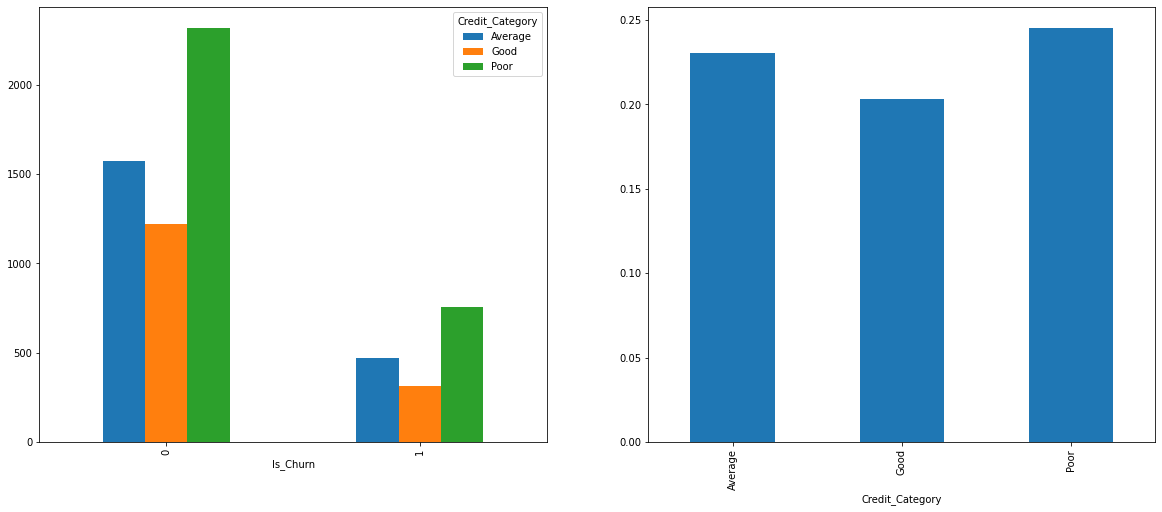

In [ ]:
crosstab = pd.crosstab(train_df["Is_Churn"], train_df["Credit_Category"])
fig,axs = plt.subplots(figsize=(20,8),ncols=2)
crosstab.plot(kind="bar",ax=axs[0])
f = crosstab.T
f['churn_rate'] = f[1]/ (f[0]+f[1])
f['churn_rate'].plot(kind='bar')
cat_cat_rel(crosstab)

* Therefore, there is a relation between Credit_Category and Is_Churn.
* Users with 'Good' category had less churn rate.



# Outlier Detection

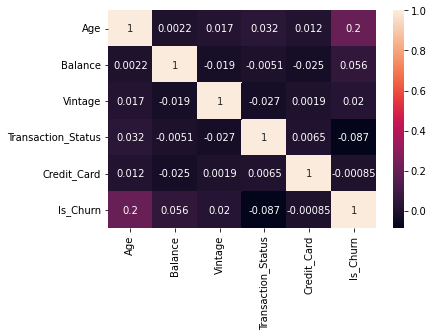

In [ ]:
sns.heatmap(train_df.corr(),annot=True)

* Age has weak positive relation with Is_Churn

In [ ]:
print(min(train_df['Age']))
print(max(train_df['Age']))
print(min(test_df['Age']))
print(max(test_df['Age']))

21
72
21
72


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
# train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)

def Iso_outliers(df):
    iso = IsolationForest(random_state = 1, contamination= 'auto')
    preds = iso.fit_predict(df.values.reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = preds
    print(data['cluster'].value_counts().sort_values(ascending=False))

def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)

Zscore_outlier(train_df['Age'])
Iso_outliers(train_df['Age'])
iqr_outliers(train_df['Age'])

Outliers: [71, 71, 71, 71, 71, 71, 71, 71, 71, 72, 72, 71, 72]
 1    3750
-1    2900
Name: cluster, dtype: int64
Outliers: [71, 71, 71, 71, 71, 71, 71, 71, 71, 72, 72, 71, 72, 68, 67, 68, 67, 71, 68, 69, 71, 69, 71, 68, 67, 67, 68, 67, 67, 68, 67, 68, 69, 68, 69, 67, 70, 70, 71, 69, 71, 69, 69, 71, 67, 67, 67, 71, 68, 71, 71, 68, 70, 69, 68, 68, 72, 68, 72, 67, 67, 68, 67, 71, 72, 69, 68, 67, 70, 68]


* Since These outliers are also present in test dataset I will not remove them.

# Feature Engineering

 * OHE for Income, Credit, Gender, Products.
 * Since Balance Hasn't been proven to be associated with Target Varible, I will apply binning on it.

In [ ]:
income = pd.get_dummies(train_df['Income'],drop_first=True)
credit = pd.get_dummies(train_df['Credit_Category'],drop_first=True)
gender = pd.get_dummies(train_df['Gender'],drop_first=True)
products = pd.get_dummies(train_df['Product_Holdings'],drop_first=True)
# age = pd.get_dummies(train_df['Age'],drop_first=True)
cut_labels_4 = ['silver', 'gold', 'platinum', 'diamond']
cut_bins = [60,390000, 760000, 1100000, 2600000]
balance= pd.cut(train_df['Balance'], bins=cut_bins, labels=cut_labels_4)
balance =pd.get_dummies(balance,drop_first=True)

In [ ]:
new_train = train_df.drop(['Income','Credit_Category','Gender','Product_Holdings','Balance'],axis=1)
new_train = pd.concat([new_train,income,credit,gender,products,balance],axis=1)
new_train.head()

,ID,Age,Vintage,Transaction_Status,Credit_Card,Is_Churn,5L - 10L,Less than 5L,More than 15L,Good,Poor,Male,2,3+,gold,platinum,diamond
0,84e2fcc9,36,4,0,0,1,1,0,0,0,0,0,0,0,1,0,0
1,57fea15e,53,2,1,1,0,0,1,0,0,1,0,0,0,0,1,0
2,8df34ef3,35,2,1,0,0,0,0,1,0,1,0,1,0,1,0,0
3,c5c0788b,43,0,1,1,1,0,0,1,0,1,0,1,0,0,0,1
4,951d69c4,39,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0


# Splitting Data (with stratification)

In [ ]:
X = new_train.drop(['Is_Churn','ID'],axis=1)
y = new_train['Is_Churn']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.1,stratify=y,random_state=45)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


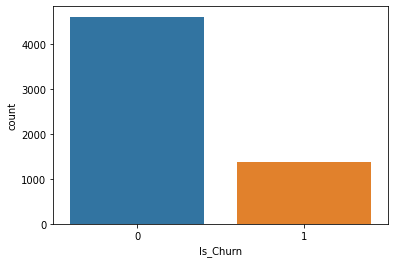

In [ ]:
sns.countplot(y_train)

In [ ]:
x_train.head()

,Age,Vintage,Transaction_Status,Credit_Card,5L - 10L,Less than 5L,More than 15L,Good,Poor,Male,2,3+,gold,platinum,diamond
354,37,2,0,0,0,1,0,0,1,1,1,0,0,0,0
286,51,2,0,0,0,1,0,0,1,1,0,0,0,0,1
50,43,1,1,1,0,0,1,0,0,0,0,0,0,0,1
2649,43,0,0,1,0,0,1,1,0,1,0,0,0,0,1
4812,40,4,0,1,0,1,0,1,0,1,0,0,0,0,1


# Multivariate Analysis (With Target)

* Using Logistic Regression to understand the signinficance of each independent variables on dependent variables  (kind of multivariate analysis )

In [ ]:
import statsmodels.api as sm
log_reg = sm.Logit(y, X).fit()
print(log_reg.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.536048
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Is_Churn   No. Observations:                 6650
Model:                          Logit   Df Residuals:                     6635
Method:                           MLE   Df Model:                           14
Date:                Sun, 13 Mar 2022   Pseudo R-squ.:                0.008485
Time:                        13:57:37   Log-Likelihood:                -3564.7
converged:                       True   LL-Null:                       -3595.2
Covariance Type:            nonrobust   LLR p-value:                 7.798e-08
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0116      0.002      5.538      0.000       0.007       0.016
Vinta

In [ ]:
import numpy as np
params = log_reg.params
conf = log_reg.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                          5%       95%  Odds Ratio
Age                 1.007495  1.015770    1.011624
Vintage             0.898874  0.969701    0.933616
Transaction_Status  0.490380  0.615714    0.549485
Credit_Card         0.681581  0.858849    0.765098
5L - 10L            0.601260  0.808009    0.697010
Less than 5L        0.586160  0.797455    0.683693
More than 15L       0.658670  0.906909    0.772887
Good                0.554794  0.760407    0.649514
Poor                0.719706  0.925805    0.816276
Male                0.573368  0.718096    0.641664
2                   0.628906  0.793625    0.706482
3+                  0.499217  0.923049    0.678824
gold                0.673098  0.923104    0.788251
platinum            0.664040  0.916401    0.780081
diamond             0.744936  1.010130    0.867457


####  * All the feature with p-value <0.05, have association with target variable.

####  * Increase in Age doesnot effect the change in Outcome(Odds Ratio ~1)
####  * All the Odds Ratio <1 shows that the event is less likely to occur (Is_Churn =1)
####  * For ex: As the Credit_Card(coded 0=Presence, 1=Absence) is 1, the Odds of Churn(to be 1) is less likey by 76%.

#### * Here the Pseudo R-squ. will be useful for comparison with different models.


In [ ]:
from sklearn.metrics import f1_score
preds = log_reg.predict(x_test)
preds = pd.DataFrame({'preds':preds})
preds['0.5'] = preds['preds'].apply(lambda x: 1 if(x>0.5) else 0)
preds['0.7'] = preds['preds'].apply(lambda x: 1 if(x>0.7) else 0)
preds['0.9'] = preds['preds'].apply(lambda x: 1 if(x>0.9) else 0)
print(f1_score(preds['0.5'],y_test,average='macro'))
print(f1_score(preds['0.7'],y_test,average='macro'))
print(f1_score(preds['0.9'],y_test,average='macro'))

0.4657957043801793
0.4345238095238095
0.4345238095238095


# Model Training

## Stacking
* Under Sampling The densed class to be approx. equal to rare class event, into multiple sets after shuffling the whole dataset.

In [ ]:
# new_train.shape
print(new_train[new_train['Is_Churn']==0].shape)
print(new_train[new_train['Is_Churn']==1].shape)

(5113, 17)
(1537, 17)


In [ ]:
6650/1537

4.326610279765777

In [ ]:
new_train = new_train.sample(frac=1)
print(new_train.shape)

(6650, 17)


In [ ]:
a = new_train[new_train['Is_Churn']==0].iloc[:1600,:]
b = new_train[new_train['Is_Churn']==1]
x_under_1 = pd.concat([a,b],axis=0)
# x_under_1
xx_under_1 = x_under_1.drop(['ID','Is_Churn'],axis=1)
y_under_1 = x_under_1['Is_Churn']
y_under_1.value_counts()

0    1600
1    1537
Name: Is_Churn, dtype: int64

In [ ]:
a = new_train[new_train['Is_Churn']==0].iloc[1600:1920,:]
b = new_train[new_train['Is_Churn']==1]
x_under_2 = pd.concat([a,b],axis=0)
# x_under_2
xx_under_2 = x_under_2.drop(['ID','Is_Churn'],axis=1)
y_under_2 = x_under_2['Is_Churn']
y_under_2.value_counts()

In [ ]:
a = new_train[new_train['Is_Churn']==0].iloc[1920:,:]
b = new_train[new_train['Is_Churn']==1]
x_under_3 = pd.concat([a,b],axis=0)
# x_under_3
xx_under_3 = x_under_3.drop(['ID','Is_Churn'],axis=1)
y_under_3 = x_under_3['Is_Churn']
y_under_3.value_counts()

##### multiple models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
model_1= RandomForestClassifier(n_estimators=600,max_depth=12,class_weight='balanced',min_samples_split=7,random_state=50)
model_1.fit(xx_under_1,y_under_1)
print(f1_score(y_test,model_1.predict((x_test)),average='macro'))

0.6683424102778941


In [ ]:
scaler2 = preprocessing.StandardScaler()
# model_2 = SVC(C=0.06199,class_weight='balanced',probability=True,random_state=45)
model_2= LogisticRegression(C=0.0399,class_weight='balanced',random_state=45,solver='saga',penalty='elasticnet',l1_ratio=0.99)
model_2.fit(scaler2.fit_transform(xx_under_2),y_under_2)
print(f1_score(y_test,model_2.predict(scaler2.transform(x_test)),average='macro'))

0.5590277058250617


In [ ]:
scaler3 = preprocessing.MinMaxScaler()
model_3= SVC(C=0.33,class_weight='balanced',probability=True,random_state=45)
model_3.fit(scaler3.fit_transform(xx_under_3),y_under_3)
print(f1_score(y_test,model_3.predict(scaler3.transform(x_test)),average='macro'))

0.5932980151386384


0.5932980151386384 0.33

In [ ]:
predictions = pd.DataFrame({'m1':[None]*665,'m2':[None]*665,'m3':[None]*665},columns=['m1','m2','m3'])
predictions['m1']=np.array(model_1.predict_proba(x_test))
predictions['m2']=np.array(model_2.predict_proba(scaler2.transform(x_test)))
predictions['m3']=np.array(model_3.predict_proba(scaler3.transform(x_test)))
predictions['mean'] = predictions[['m1','m2','m3']].mean(axis=1)

In [ ]:
predictions['0.5'] = predictions['mean'].apply(lambda x: 0 if x>=0.5 else 1)
predictions['0.7'] = predictions['mean'].apply(lambda x: 0 if x>=0.7 else 1)
predictions['0.9'] = predictions['mean'].apply(lambda x: 0 if x>=0.9 else 1)
print(f1_score(y_test,predictions['0.5'],average='macro'))
print(f1_score(y_test,predictions['0.7'],average='macro'))
print(f1_score(y_test,predictions['0.9'],average='macro'))


0.6336351441985246
0.3764906148160285
0.18803418803418803


# Submission

* Out Of all the approaches I used the stacking method

## preprocessing

In [ ]:

income = pd.get_dummies(test_df['Income'],drop_first=True)
credit = pd.get_dummies(test_df['Credit_Category'],drop_first=True)
gender = pd.get_dummies(test_df['Gender'],drop_first=True)
products = pd.get_dummies(test_df['Product_Holdings'],drop_first=True)
# age = pd.get_dummies(test_df['Age'],drop_first=True)
cut_labels_4 = ['silver', 'gold', 'platinum', 'diamond']
cut_bins = [60,390000, 760000, 1100000, 2600000]
balance= pd.cut(test_df['Balance'], bins=cut_bins, labels=cut_labels_4)
balance =pd.get_dummies(balance,drop_first=True)

In [ ]:
new_test = test_df.drop(['Income','Credit_Category','Gender','Product_Holdings','Balance'],axis=1)
new_test = pd.concat([new_test,income,credit,gender,products,balance],axis=1)
new_test.head()

,ID,Age,Vintage,Transaction_Status,Credit_Card,5L - 10L,Less than 5L,More than 15L,Good,Poor,Male,2,3+,gold,platinum,diamond
0,55480787,50,2,1,1,0,0,1,0,0,0,1,0,0,1,0
1,9aededf2,36,2,0,1,1,0,0,0,0,1,1,0,0,0,0
2,a5034a09,25,0,0,1,0,0,0,1,0,0,1,0,1,0,0
3,b3256702,41,0,1,1,0,1,0,0,1,1,1,0,0,0,0
4,dc28adb5,48,2,1,0,0,0,1,1,0,1,0,1,0,0,1


In [ ]:
new_train.head()

,ID,Age,Vintage,Transaction_Status,Credit_Card,Is_Churn,5L - 10L,Less than 5L,More than 15L,Good,Poor,Male,2,3+,gold,platinum,diamond
1119,e9d06790,37,3,1,1,1,0,0,0,0,1,0,0,0,0,0,1
4374,95aecd2e,38,3,1,0,0,0,0,1,0,1,0,1,0,1,0,0
3903,c81cd733,37,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1
6222,8b73e55e,34,4,1,0,0,0,1,0,0,1,1,1,0,0,1,0
4271,f492809d,54,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0


* Out of all the models, I used the logistic regression for submission.

In [ ]:
new_test.shape

(2851, 16)

## prediction

In [ ]:
predictions = pd.DataFrame({'m1':[None]*2851,'m2':[None]*2851,'m3':[None]*2851},columns=['m1','m2','m3'])
predictions['m1']=np.array(model_1.predict_proba(new_test.drop('ID',axis=1)))
predictions['m2']=np.array(model_2.predict_proba(scaler2.transform(new_test.drop('ID',axis=1))))
predictions['m3']=np.array(model_3.predict_proba(scaler3.transform(new_test.drop('ID',axis=1))))
predictions['mean'] = predictions[['m1','m2','m3']].mean(axis=1)

In [ ]:
predictions['0.5'] = predictions['mean'].apply(lambda x: 0 if x>=0.5 else 1)
# predictions['0.7'] = predictions['mean'].apply(lambda x: 0 if x>=0.7 else 1)
# predictions['0.9'] = predictions['mean'].apply(lambda x: 0 if x>=0.9 else 1)
# print(f1_score(y_test,predictions['0.5'],average='macro'))
# print(f1_score(y_test,predictions['0.7'],average='macro'))
# print(f1_score(y_test,predictions['0.9'],average='macro'))


## To csv

In [ ]:
new_test.isnull().sum().sum()

0

In [ ]:
sub = pd.DataFrame({
    'ID':new_test['ID'],
    'Is_Churn': predictions['0.5']
})
sub.to_csv('subn.csv',index=False)